# 05 - Unsupervised learning (clustering)

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

df = pd.read_csv("../data/heart_disease_clean.csv")
X = df.drop(columns=["target"])
y = df["target"]

X_scaled = StandardScaler().fit_transform(X)


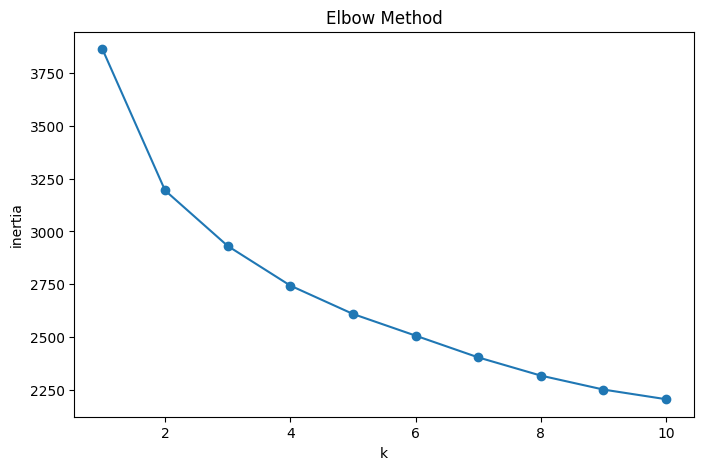

In [2]:
inertia = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5)); plt.plot(K_range, inertia, marker='o'); plt.xlabel('k'); plt.ylabel('inertia'); plt.title('Elbow Method'); plt.show()


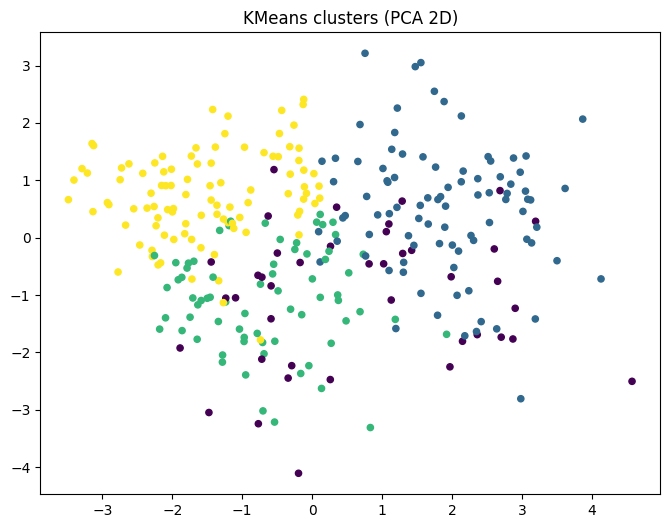

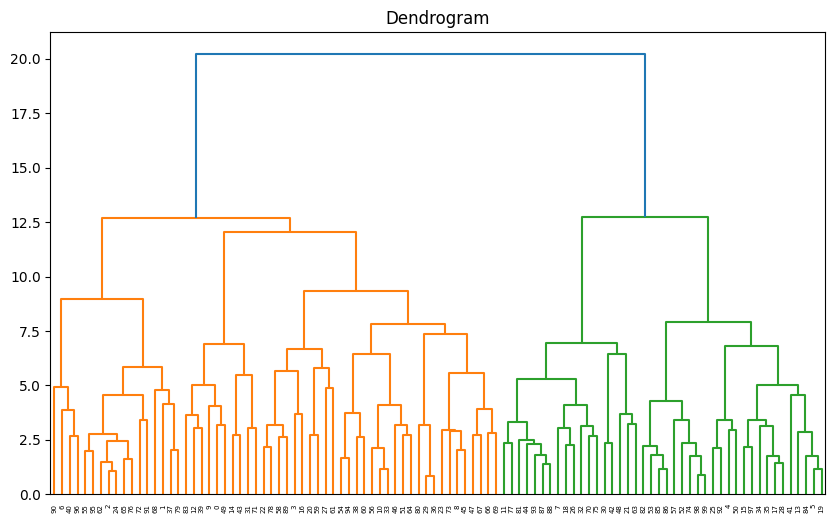

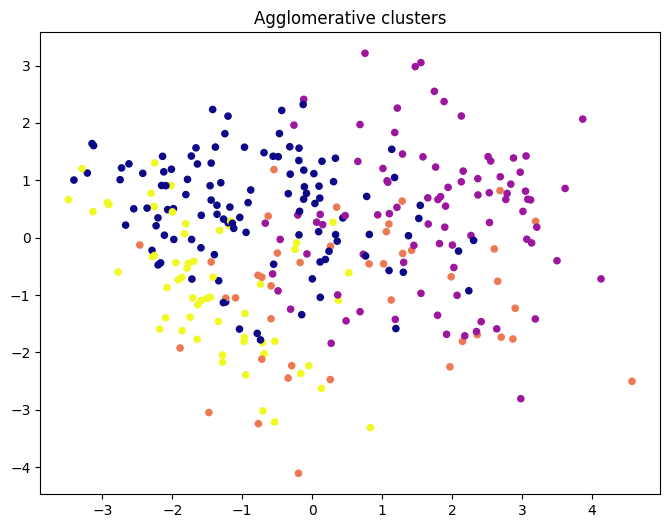

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8,6)); plt.scatter(X_pca2[:,0], X_pca2[:,1], c=clusters_kmeans, cmap='viridis', s=20); plt.title('KMeans clusters (PCA 2D)'); plt.show()

# Agglomerative + dendrogram (subset for speed)
linked = linkage(X_scaled[:100], method='ward')
plt.figure(figsize=(10,6)); dendrogram(linked, orientation='top'); plt.title("Dendrogram"); plt.show()

agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_agg = agg.fit_predict(X_scaled)
plt.figure(figsize=(8,6)); plt.scatter(X_pca2[:,0], X_pca2[:,1], c=clusters_agg, cmap='plasma', s=20); plt.title("Agglomerative clusters"); plt.show()


In [4]:
print("KMeans ARI:", adjusted_rand_score(y, clusters_kmeans))
print("KMeans NMI:", normalized_mutual_info_score(y, clusters_kmeans))
print("Agglo ARI:", adjusted_rand_score(y, clusters_agg))
print("Agglo NMI:", normalized_mutual_info_score(y, clusters_agg))


KMeans ARI: 0.1489033573489027
KMeans NMI: 0.19548846690458588
Agglo ARI: 0.0646834871605884
Agglo NMI: 0.13667800606079192
